<a href="https://csdms.colorado.edu"><img style="float: center; width: 75%" src="./media/niag.png"></a>

## Towards the sream power law

Niagara falls are advecting over a relatively short river segment where discharge can be considered constant. This is not the case for all rivers where discharge typically increases as a power function of distance downstream. 
Create a new longitudinal river profile. This time, make the river 100km long and 75m high, except for the outlet of the river (last node of array) which is the boundary condition and can be fixed to 0. 


The detachment limited equation is as follows: Consider a location on a stream channel that has local downstream slope gradient $S$ and drainage area $A$. We define an erosion $E$ as:

$$E = KA^mS^n \label{eq:1}\tag{1} $$

where $K$ is an erodibility coefficient with dimensions of $[L^{(1-2m)}/T]$. $K$ is thought to be positively correlated with climate wetness, or storminess (this is hard to quantify) and to be negatively correlated with rock strength (again, rock strength is hard to quantify). $A$ is drainage area and $S$ is the slope.  The erosion function has dimensions of erosion (lowering) rate, [L/T]. The expression is also known as the "stream power law" because the exponents can be configured to represent an erosion law that depends on stream power per unit bed area (Whipple & Tucker, 1999). A common choice of exponents is $m=1/2$, $n=1$, but other combinations are possible depending on one's assumptions about process, hydrology, channel geometry, and other factors (e.g., Howard et al., 1994; Whipple et al., 2000).

Rewriting Fluvial incision as a change of elevation in time, we get: 

$$  \frac{d z}{d t} = -E \label{eq:2}\tag{2} $$

or inserting Eq. $\ref{eq:1}$: 


$$  \frac{d z}{d t} = -KA^mS^n  \label{eq:3}\tag{3} $$

Rewriting $S$ as the slope of steepest descent ($-\frac{dz}{dx}$) where $x$ is horizontal distance (positive in the downslope direction) and $z$ is elevation results in the following partial differential equation: 

$$  \frac{\partial z}{\partial t} = -KA^m\left(\frac{\partial z}{\partial x}\right)^n  \label{eq:4}\tag{4} $$


### Numerical solution 

Can you come up with a numerical solution for the stream power law? 
Start from the solution of developed with a constant velocity ($v$, in Niagara falls examples)

##### Part 1
Use the following conditions to simulate fluvial incision: 

* Simulate a river of 15 km 
* Use spatial steps ($dx$) of 100 m 
* Start with a river profile, similar to the one use for Niagara falls (river at 70m elevation except for base level, sitting at 0 m) 
* Assume that discharge ($A$) is a power function of distance with an exponent of 1.5 $(A = x^{1.5})$. It would be unrealistic to have zero discharge at the upmost cell. To correct for this, represent discharge as  $A = x^{1.5} + dx$.

Plot the original topograpghy and drainage area along the river profile


##### Part 2
Simulate fluvial incision for a period of 10kyr. 

* Set the area exponent $m$ to 0.5 and the slope exponent $n$ to 1. 
* Use of value of $5\times10^{-4}$ 1/yr for $K$. 
* calculate, $v$, the advection speed, for all the cells of the river. Note that v is changing with distance along the fluvial profile. 
* Can you define a stable time step (Hint the maximal stable timestep can be calculated using the formulate derived in the Niagara falls notebook, yet this time adjust it using the values of the variable velocity $v$). 
* Adjust the numerical solver you developed for Niagara falls by using variable advection speeds. You can name it e.g. 'advection_solver_variable_velocity'
* Assume a fixed boundary condition of $z=0$ at the outlet where $A=max(A)$ 



In [1]:
# Import python packages

In [2]:
# def advection_solver_variable_velocity(T_num,v,dt,dx,run_duration):


In [2]:
# nb_cells = 151
# L = 15000
# dx = L / (nb_cells-1)
# print('dx is %i m'%dx)

# x=...
# z=...
# z[-1]= 0
# plt.plot(x,z)
# plt.show()
# A = ...
# plt.plot(x,A)
# plt.show()

# K = ...
# v=...

# dt = ...
# print('dt is %.02f year'%dt)


# run_duration = 10000
# z_num = advection_solver_variable_velocity(z,v,dt,dx,run_duration)
# plt.plot(x,z_num)


## Geological timescales 
* What happens if you simulate fluvial incsion for 100 kyr? 

We miss an ingredient to create realistic looking landscapes obeying to the concept: 'what goes up must come down'. 
Following mass conservation (see Tucker and Hancock, 2010) the change of elevation ($z$) in the landscape can be written as: 

$$  \frac{d z}{d t} = -E + U \label{eq:5}\tag{5} $$

or inserting Eq. $\ref{eq:1}$: 


$$  \frac{d z}{d t} = -KA^mS^n  + U \label{eq:6}\tag{6} $$

Rewriting $S$ as the slope of steepest descent ($-\frac{dz}{dx}$) where $x$ is horizontal distance (positive in the downslope direction) and $z$ is elevation results in the following partial differential equation: 

$$  \frac{\partial z}{\partial t} = -KA^m\left(\frac{\partial z}{\partial x}\right)^n  + U \label{eq:7}\tag{7} $$


### Adjusting fluvial incision to be mass conservative
* Can you find a way to insert uplift in the solution? 
* Once again, adjust the numerical solver. This time, you can name it: 'stream_power_solver'

Variables:
* Use the same dimensions and constants as above
* Assume an uplift rate of 1 m per Myr
* Assume a fixed boundary condition of $z=0$ at the outlet where $A=max(A)$ 


### Questions
What happens after 10 kyr? 100 kyr? 1 Myr? 

In [4]:
# def stream_power_solver(T_num,v,dt,dx,run_duration,U):


dx is 100 m
dt is 33.20 year


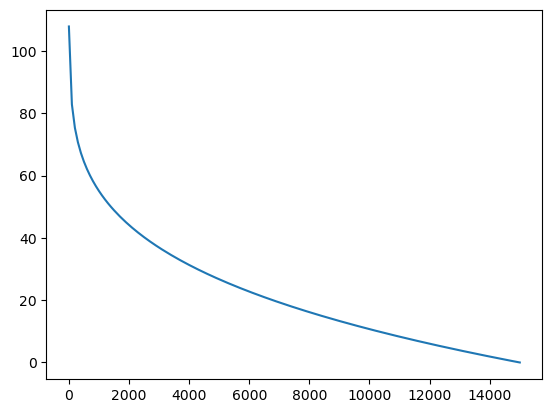

### Equilibrium

* Use the existing functions to determine when the process between uplift an erosion approaches an equilibrium. Note that at equilibrium, topography does not change through time. 
* Derive the analytical solution for the steady state topography. At steady state, we know: 
$$  \frac{d z}{d t} = 0 $$
Derive the value analytical for the slope at steady state.
* Compare the analytical value of the slope with the numerically derived one. How do they compare? 
* Hint: this is best visible on a log-log plot with Drainage area $A$ on the x-axes and Slope $S$ on the y-axes. Use a plot to show the numerical results and add the analytical ones using a scatter plot. 


Calculate analytical solution for slope in steady state
...


In [6]:
def stream_power_solver_equilibrium(T_num,v,dt,dx,U, diff_tol = 1):
    iter = 0
    difference = np.inf
    #Numerical solution 
    while difference> diff_tol:
        
        iter += 1        
        T_num_before = np.array(T_num)
        if v[-1] > 0:
            T_num[1:] -= v[1:] * dt / dx * (T_num[1:]-T_num[:-1])
            T_num[1:] += U*dt
        elif v[-1] < 0:            
            T_num[:-1] -= v[:-1] * dt / dx * (T_num[1:]-T_num[:-1])  
            T_num[:-1] += U*dt
        difference = abs(np.sum(T_num_before-T_num))
    
    return T_num, iter*dt, difference

dx is 100 m
dt is 33.20 year
difference is 0.009961 m


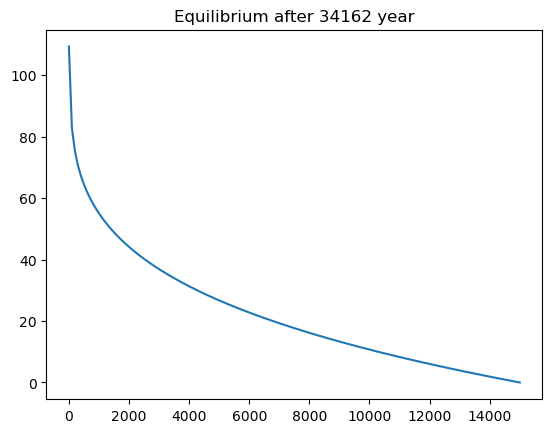

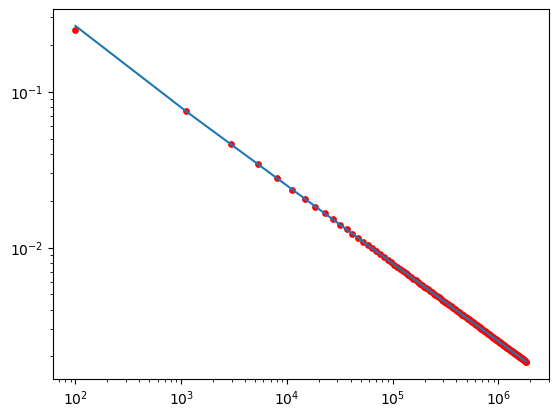

In [7]:
nb_cells = 151
L = 15000
U =5e-3
dx = L / (nb_cells-1)
print('dx is %i m'%dx)

x=np.linspace(0,L,nb_cells)
z=np.ones(nb_cells)*70
z[-1]= 0
# plt.plot(x,z)
# plt.show()
A = np.power(x,1.5)+dx
# plt.plot(x,A)
# plt.show()

K = 2*1e-3
v=-K*np.power(A,0.5)

dt = dx/np.max(np.abs(v))*0.9
print('dt is %.02f year'%dt)


[z_num, t_equilibrium, difference] = stream_power_solver_equilibrium(z,v,dt,dx,U, diff_tol = .01)
plt.plot(x,z_num)
plt.title('Equilibrium after %i year' %t_equilibrium)
print('difference is %.06f m' %difference)
plt.show()

S_num = -np.diff(z_num)/dx
S_an = U/(K*np.power(A,0.5))

# dx
# S_num
plt.plot(A[:-1], S_num)
plt.scatter(A,S_an, 15,'r')
plt.xscale('log')
plt.yscale('log')
# plt.xlabel('Distance, m')
# plt.ylabel('Slope, m/m')
# plt.show()
# S_num

### Exercise 1: Parameter sensitivity

Use the functions developed above to answer the following questions. 
Provide a clear and short explanation with figures demonstration your answer.


* How do the steady-state profile (e.g., the elevation at the channel head) and the time till steady state of the river profile vary with $K$ and with the uplift rate $U$? To test test this vary $U$ between 0.5;1 and; 2 mm per year and $K$ between 1e-3,2e-3 and 4e-3.<br> *Note that adjusting values of $K$ requires adjusting time steps $dt$ which should be accounted for through the CFL condition.*

* Now vary the length of the river profile and evaluate the dependence of the response time to the size of the river and its catchment.

### Exercise 2: River response to varying tectonic forcing
Simulate fluvial incision during 120k years. 
In a first run, double the uplift rate after 100kyr and run for 20k more years (from $U = 1 m/Myr$ to $U =2 m/Myr$). 
In a second run, halve the uplift rate after 100kyr and run for 20k more years (from $U = 1 m Myr$ to $U =0.5 m/Myr). 
Describe what you see and why. How does it look on a slope area graph? Is this conform your expectation based on the analytical solution for the slope at steady state? 

* Reset everything back to using the original parameter values. 

    * Simulate a river of 15 km 
    * Use spatial steps (dx) of 100 m 
    * Start with a river profile, similar to the one use for Niagara falls (river at 70m elevation except for base level, sitting at 0 m) 
    * Assume that discharge (A) is a power function of distance with an exponent of 1.5 $(A = x^{1.5})$. It would be unrealistic to have zero discharge at the upmost cell. To correct for this, represent discharge as  $A = x^{1.5} + dx$.
    * Set the area exponent $m$ to 0.5 and the slope exponent $n$ to 1. 
    * Use of value of $5\times10^{-4}$ 1/yr for $K$. 


dx is 100 m
dt is 132.80 year


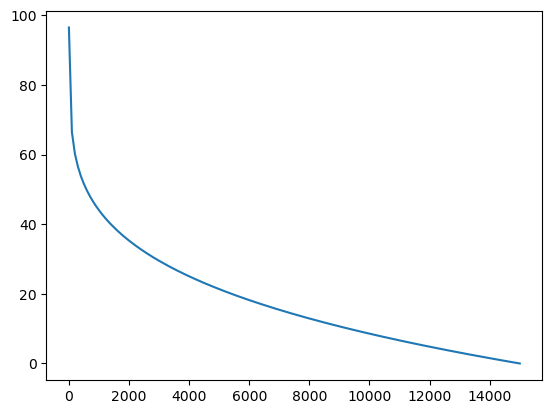

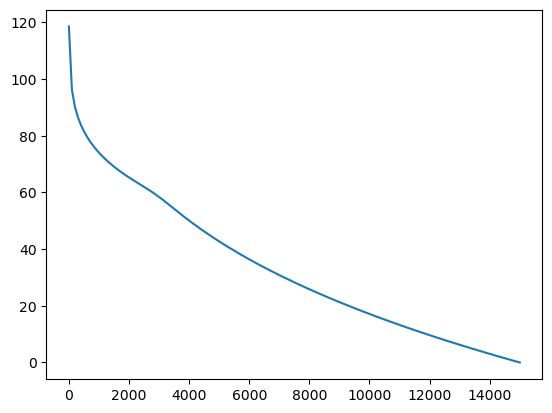

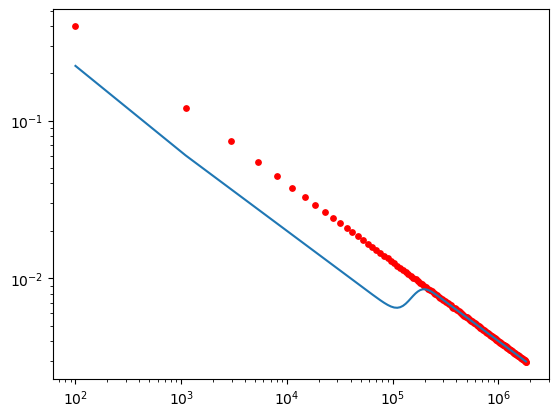

In [8]:
nb_cells = 151
L = 15000
U =1e-3
dx = L / (nb_cells-1)
print('dx is %i m'%dx)

x=np.linspace(0,L,nb_cells)
z=np.ones(nb_cells)*70
z[-1]= 0
# plt.plot(x,z)
# plt.show()
A = np.power(x,1.5)+dx
# plt.plot(x,A)
# plt.show()

K = 5*1e-4
v=-K*np.power(A,0.5)

dt = dx/np.max(np.abs(v))*0.9
print('dt is %.02f year'%dt)


run_duration = 100000
z_num = stream_power_solver(z,v,dt,dx,run_duration,U)
plt.plot(x,z_num)
plt.show()

U = U*2
run_duration = 30000
z_num = stream_power_solver(z_num,v,dt,dx,run_duration,U)
plt.plot(x,z_num)
plt.show()

S_num = -np.diff(z_num)/dx
S_an = U/(K*np.power(A,0.5))

# dx
# S_num
plt.plot(A[:-1], S_num)
plt.scatter(A,S_an, 15,'r')
plt.xscale('log')
plt.yscale('log')
# plt.xlabel('Distance, m')
# plt.ylabel('Slope, m/m')
# plt.show()
# S_num



## River incision topics:
1. [A general solution for the advection equation](advection.ipynb)
1. [Fluvial incision with the advection equation](fluvial_advection.ipynb)
1. [Stream power law](stream_power_law.ipynb)